# Assignment 1: Deep Learning for Pneumonia Detection: Analyzing Chest X-Ray Images with CNNs


# Question 1: Health Question (10 marks)

**1. Research Question:**
   - The primary research question for this assignment is: *Can a convolutional neural network (CNN) accurately detect pneumonia from chest X-ray images?*
   - According to the journal paper, the main goal is to leverage deep learning techniques to assist in the early and accurate detection of pneumonia, which is a leading cause of morbidity and mortality worldwide.

**2. Clinical Problem:**
   - **Pneumonia** is a severe lung infection that can be life-threatening, especially in vulnerable populations such as children, the elderly, and immunocompromised individuals. Early and accurate diagnosis is crucial for prompt treatment and improving patient outcomes.
   - However, diagnosing pneumonia from chest X-rays is challenging due to the similarity of its radiographic appearance to other lung conditions, and this requires skilled radiologists.

**3. Technical Task:**
   - Build, train, and evaluate a convolutional neural network (CNN) model to classify chest X-ray images as either showing signs of pneumonia or being normal. This involves data preprocessing, model construction, training, and evaluation.

**4. Application in a Clinical Setting:**
   - The algorithm should be integrated into clinical workflows to assist radiologists in screening for pneumonia, especially in settings with limited access to radiology expertise.
   - It should significantly improve diagnostic speed and accuracy, reducing the time to initiate treatment, which is crucial for patient outcomes.
   - In resource-constrained environments, this algorithm could serve as a first-pass screening tool, allowing healthcare professionals to prioritize patients for further evaluation.

**5. Programming Language:**
   - The primary programming language for this assignment is **Python**, utilizing the Keras and TensorFlow libraries for deep learning, as well as scikit-learn for evaluation metrics.

# Question 2: Docstring (5 marks)

**Purpose:** To develop and evaluate a CNN model capable of detecting pneumonia from chest X-ray images, aiding in the early diagnosis and treatment of pneumonia in a clinical setting.

**Author(s)**: Zhenyu Zhang
**zID:** z5037788

**Method:**
1. Load and preprocess chest X-ray images from the dataset.
2. Construct a CNN model using Keras and TensorFlow.
3. Train the model using a subset of the data.
4. Evaluate the model's performance using classification metrics (e.g., classification report and confusion matrix).
5. Analyze and summarize the results.

**Variables, Constants, and Functions::**
- Variables: Used for storing image data, labels, model parameters, evaluation metrics, etc.
- Constants: E.g., IMAGE_SIZE (image dimensions), BATCH_SIZE (number of samples per batch), EPOCHS (training iterations).
- Functions: Defined for tasks such as loading data, preprocessing images, building the model, training, and evaluation.
"""


# Question 3: Data Preprocessing (10 marks)

- Load and preprocess the dataset.

In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive # import drive from Gogle colab
    root = '/content/drive'     # default location for the drive
    # print(root)                 # print content of ROOT (Optional)
    drive.mount(root)
else:
    print('Not running on CoLab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Define path
from pathlib import Path

if 'google.colab' in str(get_ipython()):
    # EDIT THE PROJECT PATH IF DIFFERENT WITH YOUR ONE
    # You may need to change 'MyDrive' to 'My Drive'.
    project_path = Path(root) / 'MyDrive' / 'Colab Notebooks' / 'HDAT9510' / 'Assignment1'

    # OPTIONAL - set working directory according to your google drive project path
    # import os
    # Change directory to the location defined in project_path
    # os.chdir(project_path)
else:
    project_path = Path()

In [3]:
# Define the path to the dataset directory
data_dir = project_path / 'chest_xray'

# Load image paths
image_paths = list(data_dir.rglob('*.jpeg'))
image_paths = [str(path) for path in image_paths]

# Check the first few paths to ensure they are loaded correctly
print(image_paths[:5])


['/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/NORMAL/NORMAL2-IM-0575-0001.jpeg', '/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/NORMAL/NORMAL2-IM-0573-0001.jpeg', '/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/NORMAL/NORMAL2-IM-0572-0001.jpeg', '/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/NORMAL/NORMAL2-IM-0571-0001.jpeg', '/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/NORMAL/NORMAL2-IM-0569-0001.jpeg']


- **Code Hints:**
 - data_dir is defined as the path to the 'chest_xray' directory, which contains your 'train' and 'test' subdirectories.
 - rglob('*.jpeg') is used to recursively find all JPEG images in the specified directory, including images in both the 'train' and 'test' subdirectories.

In [4]:
print(f"Total images in dataset: {len(image_paths)}") # from Eleanore's case shown in tutorial

Total images in dataset: 5856


In [5]:
# Separate paths for `NORMAL` and `PNEUMONIA` images
normal_image_paths = [path for path in image_paths if 'normal' in path.lower()]
pneumonia_image_paths = [path for path in image_paths if 'pneumonia' in path.lower()]

print(f"Total NORMAL images: {len(normal_image_paths)}")
print(f"Total PNEUMONIA images: {len(pneumonia_image_paths)}")

Total NORMAL images: 1583
Total PNEUMONIA images: 4273


In [6]:
#  Random Sampling and Preprocessing (select 10% images from the dataset)
import random
import tensorflow as tf

# Randomly sample 10% of images from each category
sample_size_normal = int(0.15 * len(normal_image_paths))
sample_size_pneumonia = int(0.15 * len(pneumonia_image_paths))

sampled_normal_image_paths = random.sample(normal_image_paths, sample_size_normal)
sampled_pneumonia_image_paths = random.sample(pneumonia_image_paths, sample_size_pneumonia)

# Combine the sampled paths
sampled_image_paths = sampled_normal_image_paths + sampled_pneumonia_image_paths
print(f"Total sampled images: {len(sampled_image_paths)}")


Total sampled images: 877


- Perform some data augmentation techniques such as rotation, zooming, and flipping to enhance model performance.
 - aims to artificially expand the diversity of training dataset by applying random transformations like rotation, zooming, and flipping. Then helps improve model generalization.

In [7]:
# Use a larger portion of the images or all images
# sampled_image_paths = normal_image_paths + pneumonia_image_paths  # Use all images
# print(f"Total sampled images: {len(sampled_image_paths)}")


In [8]:
# Define a preprocessing and augmentation function to resize and normalize the images
def preprocess_and_augment_image(image_path):

    # Load and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)  # Convert to grayscale

    # Resize the image
    image = tf.image.resize(image, [64, 64])  # Resize to 64x64 pixels

    # Data augmentation
    image = tf.image.random_flip_left_right(image)  # Randomly flip horizontally
    image = tf.image.random_flip_up_down(image)  # Randomly flip vertically (optional)
    image = tf.image.rot90(image, k=random.randint(0, 3))  # Randomly rotate by 0, 90, 180, or 270 degrees;
    # the real-world data (e.g., chest X-rays) is expected to be in certain positions consistently (e.g., not upside-down).

    # Normalize the image
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]

    return image


In [10]:
# Batch Data Without Direct Labels
# Create a TensorFlow dataset with the image paths
dataset = tf.data.Dataset.from_tensor_slices(sampled_image_paths)

# Map preprocessing function to the dataset
dataset = dataset.map(preprocess_and_augment_image)

# Batch the preprocessed
batch_size = 128 # Adjust batch size as needed
dataset = dataset.batch(batch_size)

# Verify the batching by viewing the shape of a batch
for batch in dataset.take(1):
    print("Batch shape:", batch.shape)

Batch shape: (128, 64, 64, 1)


# Question 4: model-2-classes-benchmark - Model Training and Evaluation (15 marks)

- Implement a CNN to classify images as 'normal' or 'pneumonia'. Use the model you created in the 'Before-class: Weekly Hands-on Mini-Exercise' section [week 1], and add at least one extra component at your discretion. Explain the rationale behind your addition/s.

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip install tensorflow-addons

In [11]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf

import keras
from keras import ops
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import AdamW



# Define activation choice with updated parameter
activation_choice = 'LeakyReLU'  # Options: 'LeakyReLU' or 'ReLU'

# Set activation function based on choice
if activation_choice == 'LeakyReLU':
    activation = layers.LeakyReLU(negative_slope=0.01)
else:
    activation = layers.ReLU()

# Increased latent dimension for potentially better feature extraction
latent_dim = 64  # Adjust number based on the desired dimensionality of the latent space

### **Leaky ReLU**
- **In ReLU (Rectified Linear Unit)**:
  - `f(x) = x` if `x > 0`
  - `f(x) = 0` if `x <= 0`

  This means that for any input value less than or equal to zero, the output is zero, effectively "turning off" those neurons.

- **Leaky ReLU** is a variation of ReLU designed to address a problem known as the **"dying ReLU" problem**. In standard ReLU, neurons with negative inputs always output zero, which can cause them to become inactive during training (they stop learning).

### Use `negative_slope` in Leaky ReLU
- **Prevents Dead Neurons**: With ReLU, neurons with negative inputs can become inactive (i.e., they output zero and stop learning). Leaky ReLU allows these neurons to output small negative values, which means they continue to contribute to learning and don’t become "dead."
- **Better Gradient Flow**: During backpropagation, the gradients are non-zero for negative inputs, helping the learning process, especially in deep networks.
- **Flexibility**: By adjusting `negative_slope`, you can control how much the negative side contributes to the learning process.

### Common Values
- A common choice is `negative_slope=0.01`, which allows a small amount of negative output.
- Using `negative_slope=0.1` makes the negative output larger, which might be beneficial if you want to allow a more substantial gradient flow for negative values.





### 1. **`latent_dim`**:
   -  `latent_dim` defines the size of the compressed representation (or the number of dimensions) in the latent space of the VAE. It’s the number of features that the encoder condenses the input data into before passing it to the decoder.
   - **Lower Values (e.g., 2-10)**:
     - Leads to a highly compressed representation.
     - May struggle to capture the complexity of the input data.
     - Good for **visualizing the latent space**, but might lose important information for more complex data like images.
   - **Higher Values (e.g., 50-200)**:
     - Captures more information, leading to better reconstructions.
     - Can learn more subtle variations between the classes (`NORMAL` and `PNEUMONIA`).
     - However, a larger latent space can be harder to train and might require more data and time.


In [12]:
# Define the Sampling class for the VAE
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [13]:
# Define the encoder with Dropout and Batch Normalization
def build_encoder(input_shape=(64, 64, 1)):
    encoder_inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), strides=2, padding='same')(encoder_inputs)
    x = layers.BatchNormalization()(x)  # Batch Normalization added
    x = activation(x)
    x = layers.Dropout(0.4)(x)  # Dropout layer added and slightly increased dropout rate
    x = layers.Conv2D(64, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32)(x)  # Increased dense units before latent layers
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder



In [14]:
# Define the decoder
def build_decoder(latent_dim=64):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(16 * 16 * 64)(latent_inputs)
    x = layers.BatchNormalization()(x)  # Batch Normalization added
    x = activation(x)
    x = layers.Dropout(0.4)(x)  # Dropout layer added and slightly increased dropout rate
    x = layers.Reshape((16, 16, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    decoder_outputs = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
    decoder = models.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder


In [15]:
# Build models
encoder = build_encoder()
decoder = build_decoder()


In [16]:
# Define the VAE class with custom training
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstructed = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.keras.losses.binary_crossentropy(data, reconstructed), axis=(1, 2))
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}



- For binary classification (NORMAL vs. PNEUMONIA): Do not need a VAE structure with sampling
- Input Shape: The input shape is defined as (64, 64, 1), suitable for grayscale images.
- Convolutional Layers: Three convolutional layers progressively extract features, each followed by max-pooling to reduce spatial dimensions.
- Flatten Layer: Converts the 2D output from convolutional layers into a 1D vector for the dense layer.
- Dense Layers: Two dense layers with ReLU activation provide the non-linearity, while **Dropout** prevents overfitting.
- Output Layer: Uses a sigmoid function for binary classification (0 for normal, 1 for pneumonia).



### Add Dropout for Regularization
Dropout is a regularization technique that helps prevent overfitting. Including a **Dropout** layer between dense layers in the encoder and decoder can make the model more robust

### Add Batch Normalization
Batch Normalization helps in stabilizing and accelerating training by normalizing the inputs to each layer. Adding it after each convolutional layer can make the network more stable

In [18]:
# Instantiate and compile the VAE with AdamW optimizer for potentially better convergence
vae = VAE(encoder, decoder)
vae.compile(optimizer=AdamW(learning_rate=0.001))

# Define learning rate scheduler for dynamic adjustment
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Train the model with the updated callbacks and training settings
epochs = 30  # Adjusted to give the model more time to learn
history = vae.fit(dataset, epochs=epochs, callbacks=[early_stopping, lr_callback])

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - kl_loss: 4.3105 - loss: 2610.3008 - reconstruction_loss: 2605.9902 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - kl_loss: 7.1410 - loss: 2590.1082 - reconstruction_loss: 2582.9673 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - kl_loss: 8.3759 - loss: 2571.3027 - reconstruction_loss: 2562.9270 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - kl_loss: 11.0239 - loss: 2556.8948 - reconstruction_loss: 2545.8708 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - kl_loss: 13.8484 - loss: 2539.2964 - reconstruction_loss: 2525.4480 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - kl_loss: 14.6648 - loss: 2527.2170 - reconstruction_loss: 2512.5522 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - kl_loss: 15.7425 - loss: 2512.5095 - reconstruction_loss: 2496.7671 - learning_rate: 0.0010
Epoch 8/3

Using a **Learning Rate Scheduler** can help in reducing the learning rate as training progresses, allowing the model to settle into better solutions:

The custom train_step method for the VAE resolved the mismatch with the default training loop.
When using a Variational Autoencoder (VAE) with a custom Sampling layer, typically need a custom training step to properly compute the loss. The standard .fit() method may fail without it because it doesn't handle the KL divergence that is part of VAEs.

- Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score, and AUC..

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the history into a pandas DataFrame for easier plotting
history_df = pd.DataFrame(history.history)


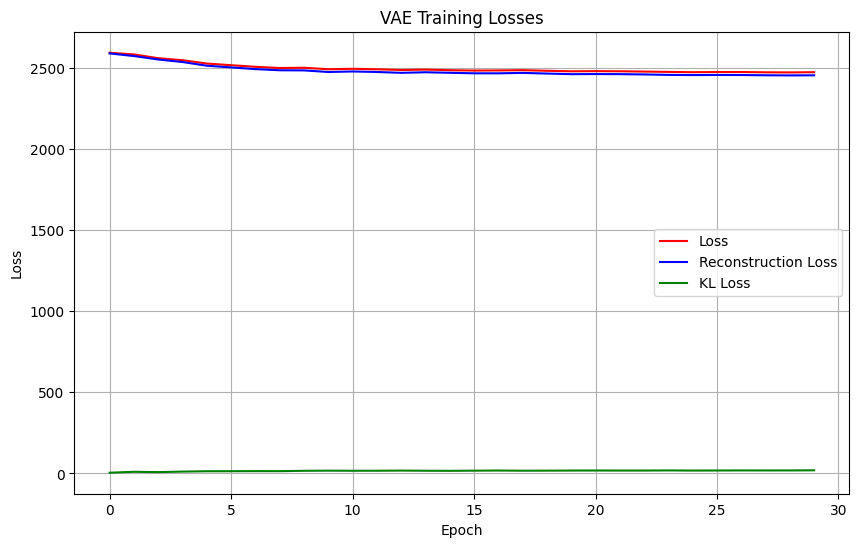

In [20]:
import matplotlib.pyplot as plt

# Plot the training losses manually using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], 'r-', label='Loss')
plt.plot(history_df['reconstruction_loss'], 'b-', label='Reconstruction Loss')
plt.plot(history_df['kl_loss'], 'g-', label='KL Loss')
plt.title('VAE Training Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


### Explanation:
- **DataFrame**: Converts the training history into a `pandas` DataFrame so that each loss component is accessible for plotting.
- **Plotting**: Plots the losses over each epoch using `matplotlib`.
  - `loss` is the total loss (combination of reconstruction loss and KL divergence).
  - `reconstruction_loss` tracks how well the VAE reconstructs input images.
  - **Loss Trends**: This plot helps to visualize how the losses change over time. Ideally, the total loss and reconstruction loss to decrease over epochs, indicating that the VAE is learning to reconstruct the images better.

  - `kl_loss` tracks the KL divergence, which regularizes the latent space.
  - **KL Divergence**: If the `kl_loss` stabilizes over time, it suggests that the model is finding a good balance between fitting the data and maintaining a regularized latent space.

   - The total loss, reconstruction loss, and KL loss are converging as the training progresses. However, the values remain quite high, indicating that the model might still be struggling to reconstruct the input images accurately.
   - The KL loss remains significantly lower compared to the reconstruction loss, suggesting that the model might not be fully utilizing the latent space, which could affect its ability to capture the underlying patterns in the data.

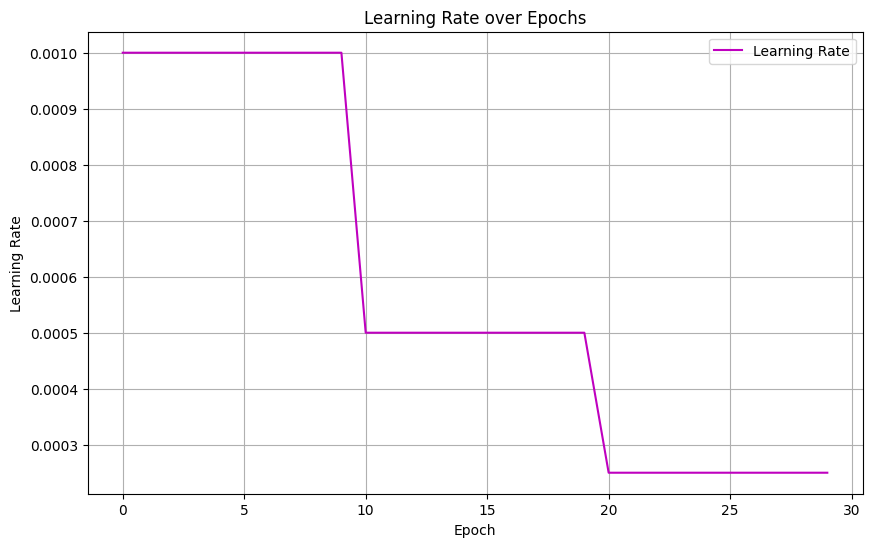

In [21]:
# Plot learning rate changes manually
plt.figure(figsize=(10, 6))
plt.plot(history_df['learning_rate'], 'm-', label='Learning Rate')
plt.title('Learning Rate over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.legend()
plt.show()

   - The learning rate decreases every 10 epochs, which is helping the model converge. However, the decrease might be too aggressive, especially if the model hasn't learned enough from each stage before the learning rate is reduced.
   - It appears that the learning rate drops to a very low value toward the end, which might prevent the model from making further significant improvements.

### Improvement
- Consider increasing the `latent_dim` from 32 to a higher value (e.g., 64 or 128). A higher dimensional latent space might help the VAE capture more complex patterns
- Using more training samples
- Reduce the factor by which the learning rate decreases. For instance, instead of halving it every 10 epochs, reducing it by 10% to 20% might be better.
- Increasing the batch size might speed up training and provide better gradient estimates.
- Add more convolutional layers to the encoder and decoder with a gradual increase in the number of filters (e.g., 32, 64, 128). This might help the network extract more intricate features from the images.

In [22]:
import numpy as np

def compute_reconstruction_errors(vae, dataset, normal_size, pneumonia_size):
    reconstruction_errors = []
    true_labels = []

    for batch in dataset:
        # Generate the reconstruction of the batch
        reconstructed_batch = vae.predict(batch)

        # Compute the reconstruction error for each image (Mean Squared Error)
        batch_errors = np.mean(np.square(batch - reconstructed_batch), axis=(1, 2, 3))

        reconstruction_errors.extend(batch_errors)

    # Create labels: 0 for NORMAL and 1 for PNEUMONIA
    true_labels = [0] * normal_size + [1] * pneumonia_size

    return reconstruction_errors, true_labels

Function used to compute the reconstruction error for each image in the dataset.

Parameters:
  - vae: Trained VAE model.
  - dataset: tf.data.Dataset containing the images.
  - normal_size: Number of NORMAL images in the dataset.
  - pneumonia_size: Number of PNEUMONIA images in the dataset.
    
Returns:
  - reconstruction_errors: List of reconstruction errors for each image.
  - true_labels: List of true labels for each image.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.15      0.28      0.20       237
   PNEUMONIA       0.61      0.42      0.50       640

    accuracy                           0.38       877
   macro avg       0.38      0.35      0.35       877
weighted avg       0.49      0.38      0.41       877

Confusion Matrix:
[[ 66 171]
 [373 267]]


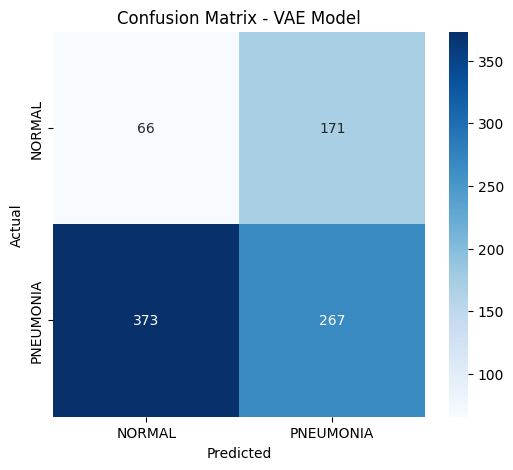

In [23]:
# Define the number of NORMAL and PNEUMONIA images in the dataset
normal_size = len(sampled_normal_image_paths)
pneumonia_size = len(sampled_pneumonia_image_paths)

# Compute the reconstruction errors and true labels
reconstruction_errors, true_labels = compute_reconstruction_errors(vae, dataset, normal_size, pneumonia_size)

# Compute threshold based on the median of reconstruction errors
threshold = np.median(reconstruction_errors)

# Make predictions based on the threshold
predicted_labels = [1 if error > threshold else 0 for error in reconstruction_errors] # 1 for 'PNEUMONIA', 0 for 'NORMAL'

# Evaluate the model performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['NORMAL', 'PNEUMONIA']))

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NORMAL', 'PNEUMONIA'], yticklabels=['NORMAL', 'PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - VAE Model')
plt.show()


### 1. **Precision**:
   - **NORMAL**: Precision is 0.15, meaning that when the model predicts `NORMAL`, it's correct only 15% of the time. This is quite low and suggests that the model often misclassifies pneumonia cases as normal.
   - **PNEUMONIA**: Precision is 0.61, indicating that when the model predicts `PNEUMONIA`, it is correct 61% of the time. This is better than `NORMAL`, but still not ideal.
   - Precision is important for understanding the model’s performance in terms of false positives, and here it indicates that the model generates many false positives for `NORMAL`.

### 2. **Recall**:
   - **NORMAL**: Recall is 0.28, meaning that only 28% of the actual `NORMAL` cases are correctly identified by the model. This indicates a high rate of false negatives, where normal cases are classified as pneumonia.
   - **PNEUMONIA**: Recall is 0.42, suggesting that the model identifies 42% of actual `PNEUMONIA` cases. This is also low, indicating that a significant number of pneumonia cases are missed.
   - Low recall is particularly problematic for pneumonia detection because missing a pneumonia case could lead to serious health risks for patients.

### 3. **F1-Score**:
   - The **F1-score** is the harmonic mean of precision and recall, balancing both aspects.
   - **NORMAL**: F1-score is 0.20, which is very low and suggests poor overall performance for identifying `NORMAL` cases.
   - **PNEUMONIA**: F1-score is 0.50, showing a better balance than `NORMAL` but still not high enough for reliable use in medical diagnosis.
   - The low F1-scores indicate that the model is not effectively balancing false positives and false negatives.

### 4. **Accuracy**:
   - The overall accuracy of the model is 0.38 (38%), meaning that the model's predictions are correct only 38% of the time.
   - In a binary classification task, an accuracy close to 50% indicates that the model is barely better than random guessing. Given the class imbalance (more pneumonia cases than normal), the model's performance is insufficient for practical use.

### 5. **Macro and Weighted Averages**:
   - The **macro average** is 0.38 for precision and 0.35 for recall, showing that when both classes are treated equally, the model's performance remains poor.
   - The **weighted average** accounts for the imbalance in class support (more pneumonia cases), and it is slightly better than the macro average but still not acceptable (precision: 0.49, recall: 0.38).

### 6. **Confusion Matrix**:
   - **True Positives (TP) for PNEUMONIA**: 267 cases are correctly identified as `PNEUMONIA`.
   - **True Negatives (TN) for NORMAL**: 66 cases are correctly identified as `NORMAL`.
   - **False Positives (FP) for PNEUMONIA**: 171 cases that are actually `NORMAL` are incorrectly identified as `PNEUMONIA`.
   - **False Negatives (FN) for NORMAL**: 373 cases that are actually `PNEUMONIA` are incorrectly classified as `NORMAL`.
   - The high number of false negatives for pneumonia (373 cases) is particularly concerning, as it indicates that a large proportion of pneumonia cases are being missed. Similarly, the low detection rate of normal cases (66 correct out of 237) shows poor ability to accurately identify healthy patients. The model needs significant improvement to be clinically useful.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


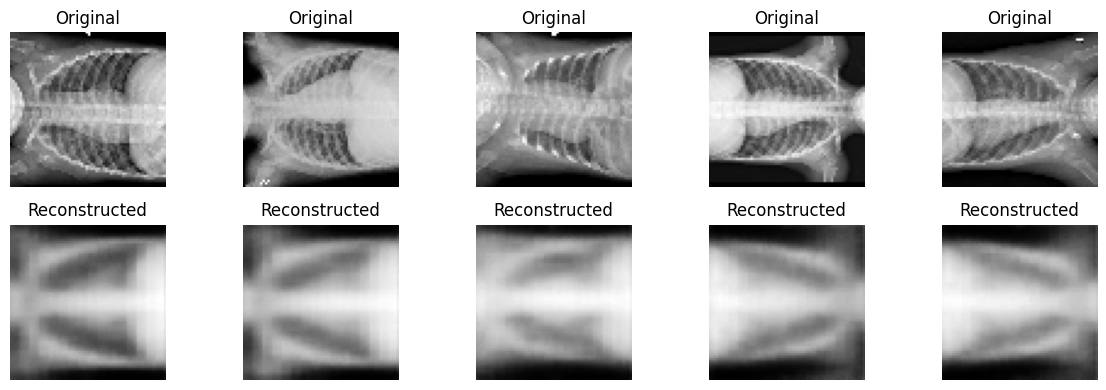

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to visualize original and reconstructed images
def visualize_reconstructions(original_images, reconstructed_images, num_images=5):
    plt.figure(figsize=(12, 4))
    for i in range(num_images):
        # Display original
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(tf.squeeze(original_images[i]), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(tf.squeeze(reconstructed_images[i]), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select a batch of images from the dataset for visualization
original_images = list(dataset.take(1))[0]

# Use the VAE to reconstruct the images
reconstructed_images = vae.predict(original_images)

# Visualize the original and reconstructed images
visualize_reconstructions(original_images, reconstructed_images, num_images=5)


Based on the displayed results, it is clear that the VAE model is struggling to accurately reconstruct fine details from the chest X-ray images. The reconstructions appear blurry, suggesting that the latent space might be too constrained or that the model's architecture lacks the capacity to capture and represent detailed features. In conclusion, the model is not capturing enough detail for accurate reconstruction.

- Name the model 'model-2-classes-benchmark'. Save the model so you don't have to retrain it every time you close and reopen the notebook.

In [25]:
# Save the model with a specific name and .keras extension
model_name = 'model-2-classes-benchmark.keras'
vae.save(model_name)

# Question 5 - model-3-classes - Model Training and Evaluation (10 marks)

In [26]:
import tensorflow as tf
import random

# Prepare Data for Multi-Class Classification
# Separate paths for normal, bacterial and viral pneumonia paths
normal_image_paths = [path for path in image_paths if 'normal' in path.lower()]
bacterial_image_paths = [path for path in pneumonia_image_paths if 'bacteria' in path.lower()]
viral_image_paths = [path for path in pneumonia_image_paths if 'virus' in path.lower()]

print(f"Total NORMAL images: {len(normal_image_paths)}")
print(f"Total bacterial pneumonia images: {len(bacterial_image_paths)}")
print(f"Total viral pneumonia images: {len(viral_image_paths)}")


Total NORMAL images: 1583
Total bacterial pneumonia images: 2780
Total viral pneumonia images: 1493


In [27]:
# Sample 40% of each
sample_size_normal = int(0.4 * len(normal_image_paths))
sample_size_bacterial = int(0.4 * len(bacterial_image_paths))
sample_size_viral = int(0.4 * len(viral_image_paths))

sampled_normal_image_paths = random.sample(normal_image_paths, sample_size_normal)
sampled_bacterial_image_paths = random.sample(bacterial_image_paths, sample_size_bacterial)
sampled_viral_image_paths = random.sample(viral_image_paths, sample_size_viral)

# Combine `NORMAL`, `bacterial pneumonia`, and `viral pneumonia` sampled images
multi_class_image_paths = sampled_normal_image_paths + sampled_bacterial_image_paths + sampled_viral_image_paths
print(f"Total multi-class sampled images: {len(multi_class_image_paths)}")

Total multi-class sampled images: 2342


In [28]:
# Assign labels to the images
# 0: NORMAL, 1: BACTERIAL PNEUMONIA, 2: VIRAL PNEUMONIA
normal_labels = [0] * len(sampled_normal_image_paths)
bacterial_labels = [1] * len(sampled_bacterial_image_paths)
viral_labels = [2] * len(sampled_viral_image_paths)

# Combine image paths and labels
multi_class_labels = normal_labels + bacterial_labels + viral_labels


In [29]:
# Define a preprocessing and augmentation function to resize and normalize the images
def preprocess_and_augment_image2(image_path):

    # Load and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=1)  # Convert to grayscale

    # Resize the image
    image = tf.image.resize(image, [64, 64])  # Resize to 64x64 pixels

    # Data augmentation
    image = tf.image.random_flip_left_right(image)  # Randomly flip horizontally
    image = tf.image.random_brightness(image, max_delta=0.1)  # Randomly adjust brightness
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # Randomly adjust contrast

    # Normalize the image
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]

    return image

In [30]:
# Shuffle the data
combined = list(zip(multi_class_image_paths, multi_class_labels))
random.shuffle(combined)
multi_class_image_paths, multi_class_labels = zip(*combined)

# Create a TensorFlow dataset from image paths and labels
multi_class_dataset = tf.data.Dataset.from_tensor_slices((list(multi_class_image_paths), list(multi_class_labels)))


In [31]:
print(f"Size of initial multi_class_dataset: {len(list(multi_class_dataset))}")


Size of initial multi_class_dataset: 2342


In [32]:
# Print out a few elements before mapping
for image_path, label in multi_class_dataset.take(2):
    print(f"Image path: {image_path.numpy()}, Label: {label.numpy()}")

Image path: b'/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/PNEUMONIA/person1012_bacteria_2943.jpeg', Label: 1
Image path: b'/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/PNEUMONIA/person1403_virus_2406.jpeg', Label: 2


In [33]:
# Define a function to preprocess images and their labels with augmentation
def preprocess_image_label(image_path, label):

    image = preprocess_and_augment_image2(image_path)   # Preprocess and augment the image
    classification_target = tf.one_hot(label, depth=3)  # One-hot encode the classification label

    return image, (image, classification_target)        # # The image is used as both input and reconstruction target

# Map the preprocessing function to the dataset
multi_class_dataset_mapped = multi_class_dataset.map(preprocess_image_label)

In [34]:
# Print out after mapping
for image, (reconstruction_target, classification_target) in multi_class_dataset_mapped.take(2):
    print(f"Image shape: {image.shape}")
    print(f"Reconstruction target shape: {reconstruction_target.shape}")
    print(f"Classification target shape: {classification_target.shape}")

Image shape: (64, 64, 1)
Reconstruction target shape: (64, 64, 1)
Classification target shape: (3,)
Image shape: (64, 64, 1)
Reconstruction target shape: (64, 64, 1)
Classification target shape: (3,)


In [35]:
def filter_images_by_shape(image, labels):
    # Ensure the image has the shape [64, 64, 1]
    return tf.reduce_all(tf.equal(tf.shape(image), tf.constant([64, 64, 1])))

# Apply the filter to ensure consistent image shapes
multi_class_dataset_filtered = multi_class_dataset_mapped.filter(lambda image, labels: filter_images_by_shape(image, labels))


In [42]:
# Split the Dataset into training and validation sets
dataset_size = len(multi_class_image_paths)
train_size = int(0.8 * dataset_size)  # 80% for training
val_size = dataset_size - train_size  # 20% for validation


In [43]:
# Print the sizes to check
print(f"Dataset size: {dataset_size}")
print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")

Dataset size: 2342
Training set size: 1873
Validation set size: 469


In [44]:
# Shuffle and split the dataset
train_dataset = multi_class_dataset_filtered.take(train_size)
val_dataset = multi_class_dataset_filtered.skip(train_size)


In [47]:
print(f"Total multi-class sampled images: {len(multi_class_image_paths)}")

Total multi-class sampled images: 2342


In [51]:
# Batch the dataset
batch_size = 128
train_dataset_batched = train_dataset.batch(batch_size, drop_remainder=True)
val_dataset_batched = val_dataset.batch(batch_size, drop_remainder=True)


In [52]:
# Check the dataset size after splitting and batching
print(f"Size of train_dataset: {len(list(train_dataset_batched))}")
print(f"Size of val_dataset: {len(list(val_dataset_batched))}")


Size of train_dataset: 14
Size of val_dataset: 3


In [53]:
#  Inspect shapes after batching
for image, (reconstruction_target, classification_target) in multi_class_dataset_batched.take(2):
    print(f"Image shape: {image.shape}")
    print(f"Reconstruction target shape: {reconstruction_target.shape}")
    print(f"Classification target shape: {classification_target.shape}")


Image shape: (128, 64, 64, 1)
Reconstruction target shape: (128, 64, 64, 1)
Classification target shape: (128, 3)
Image shape: (128, 64, 64, 1)
Reconstruction target shape: (128, 64, 64, 1)
Classification target shape: (128, 3)


In [ ]:
# # Apply repeat (option) (not used here)
# # Batch the dataset and repeat to avoid running out of data
# train_dataset = train_dataset.batch(batch_size, drop_remainder=True).repeat()
# val_dataset = val_dataset.batch(batch_size, drop_remainder=True).repeat()

# print(f"Size of train_dataset: {len(list(train_dataset))}")
# print(f"Size of val_dataset: {len(list(val_dataset))}")

Given the dataset sizes provided before:

Dataset size: 2342 total images
Training set size: 1873 images (80% of the total)
Validation set size: 469 images (20% of the total)

And the batch size of 128, this means:
Training set:
1873 / 128 ≈ 14.63 batches, so will have 14 full batches, and one last partial batch with around 89 images.

Validation set:
469 / 128 ≈ 3.66 batches, meaning will have 3 full batches and one last partial batch with around 85 images.

There are sufficient number of samples and batches, can proceed without `repeat()`  

- Implement a CNN to classify images into "normal", "bacterial pneumonia" and "viral pneumonia".

In [54]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf

import keras
from keras import ops
from keras import layers
from keras import models
from keras import optimizers
from keras.optimizers import AdamW

# Define activation choice with updated parameter
activation_choice = 'LeakyReLU'  # Options: 'LeakyReLU' or 'ReLU'

# Set activation function based on choice
if activation_choice == 'LeakyReLU':
    activation = layers.LeakyReLU(negative_slope=0.01)
else:
    activation = layers.ReLU()

# Adjusted latent dimension for better feature capture
latent_dim2 = 128  # Increased to capture more complex features


In [55]:
# Define the Sampling class for the VAE
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [56]:
# Step 2.1: Define the encoder with Dropout and Batch Normalization
def build_encoder2(input_shape=(64, 64, 1), latent_dim=latent_dim2):
    encoder_inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), strides=2, padding='same')(encoder_inputs)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2D(64, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64)(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder2")
    return encoder

encoder2 = build_encoder2()

In [57]:
encoder2.summary()

Model: "encoder2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 64, 64, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 32)     │            320 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 32, 32, 32)     │            128 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64)             │              0 │ batch_normalization_6… │
│                           │                        │                │ batch_normalization_7… │
│                           │                        │                │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 32, 32, 32)     │              0 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 16, 16, 64)     │         18,496 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 16, 16, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 16, 16, 64)     │              0 │ leaky_re_lu_1[1][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 16384)          │              0 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │      1,048,640 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 64)             │            256 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_8 (Dropout)       │ (None, 64)             │              0 │ leaky_re_lu_1[2][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 128)            │          8,320 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 128)            │          8,320 │ dropout_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sampling_1 (Sampling)     │ (None, 128)            │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,084,736 (4.14 MB)

 Trainable params: 1,084,416 (4.14 MB)

 Non-trainable params: 320 (1.25 KB)

In [58]:
# Step 2.2: Define the decoder
def build_decoder2(latent_dim=latent_dim2):
    latent_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(16 * 16 * 64)(latent_inputs)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Reshape((16, 16, 64))(x)
    x = layers.Conv2DTranspose(64, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = activation(x)
    x = layers.Dropout(0.4)(x)
    decoder_outputs = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)
    decoder = models.Model(latent_inputs, decoder_outputs, name="decoder2")
    return decoder

decoder2 = build_decoder2()

In [59]:
decoder2.summary()

Model: "decoder2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 128)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 16384)          │      2,113,536 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 16384)          │         65,536 │ dense_3[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 64, 64, 32)     │              0 │ batch_normalization_9… │
│                           │                        │                │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 16384)          │              0 │ leaky_re_lu_1[3][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 16, 16, 64)     │              0 │ dropout_9[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_3        │ (None, 32, 32, 64)     │         36,928 │ reshape_1[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 64)     │            256 │ conv2d_transpose_3[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 32, 32, 64)     │              0 │ leaky_re_lu_1[4][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_4        │ (None, 64, 64, 32)     │         18,464 │ dropout_10[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 64, 64, 32)     │            128 │ conv2d_transpose_4[0]… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_11 (Dropout)      │ (None, 64, 64, 32)     │              0 │ leaky_re_lu_1[5][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_5        │ (None, 64, 64, 1)      │            289 │ dropout_11[0][0]       │
│ (Conv2DTranspose)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,235,137 (8.53 MB)

 Trainable params: 2,202,177 (8.40 MB)

 Non-trainable params: 32,960 (128.75 KB)

In [60]:
# Step 2.3: Build a simple classifier model for multi-class classification using the latent vectors.
def build_classifier(latent_dim=latent_dim2):
    classifier_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(64, activation='relu')(classifier_inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # The output shape should match the batch size (None) and number of classes (3)
    classifier_outputs = layers.Dense(3, activation='softmax')(x)  # Ensure batch-wise output
    classifier = models.Model(classifier_inputs, classifier_outputs, name="classifier")
    return classifier


classifier = build_classifier()

In [61]:
classifier.summary()

Model: "classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,435 (40.76 KB)

 Trainable params: 10,435 (40.76 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Define the VAE class with custom training
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        return reconstructed

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstructed = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.keras.losses.binary_crossentropy(data, reconstructed), axis=(1, 2))
            )
            kl_loss = -0.5 * tf.reduce_mean(
                tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
            )
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        return {"loss": total_loss, "reconstruction_loss": reconstruction_loss, "kl_loss": kl_loss}

In [ ]:
# # Map the dataset using the new preprocessing function
# train_dataset_mapped = train_dataset.map(lambda x, y: (x, (x, y[1])))  # Image for reconstruction, label for classification
# val_dataset_mapped = val_dataset.map(lambda x, y: (x, (x, y[1])))  # Same for validation

# # Check if the mapping is correct
# for batch in train_dataset_mapped.take(1):
#     images, (reconstruction_target, classification_target) = batch
#     print(f"Images shape: {images.shape}")
#     print(f"Reconstruction target shape: {reconstruction_target.shape}")
#     print(f"Classification target shape: {classification_target.shape}")


In [63]:
# Define input layer
inputs = tf.keras.Input(shape=(64, 64, 1))

# Get the outputs from the encoder, decoder, and classifier
z_mean, z_log_var, z = encoder2(inputs)
reconstruction_output = decoder2(z)
classification_output = classifier(z)

print(f"z_mean shape: {z_mean.shape}, z_log_var shape: {z_log_var.shape}, z shape: {z.shape}")


z_mean shape: (None, 128), z_log_var shape: (None, 128), z shape: (None, 128)


In [64]:
# Rename the outputs explicitly using Keras' Lambda layer
reconstruction_output = tf.keras.layers.Lambda(lambda x: x, name='reconstruction_output')(reconstruction_output)
classification_output = tf.keras.layers.Lambda(lambda x: x, name='classification_output')(classification_output)

# Create the model with the renamed outputs
vae_with_classifier_model = tf.keras.Model(
    inputs=inputs,
    outputs=[reconstruction_output, classification_output]
)

# Print output names to verify
print("Model output names before compile:", vae_with_classifier_model.output_names)


Model output names before compile: ListWrapper(['reconstruction_output', 'classification_output'])


In [65]:
# Compile the model with correct output names in the loss function
vae_with_classifier_model.compile(
    optimizer=AdamW(learning_rate=0.001),
    loss={
        'classification_output': 'categorical_crossentropy',  # Classification loss
        'reconstruction_output': 'mse'  # Reconstruction loss
    },
    metrics={'classification_output': 'accuracy'}  # Track accuracy for classification
)

# Print output names again after compile to confirm
vae_with_classifier_model.summary()
print("Model output names after compile:", vae_with_classifier_model.output_names)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 64, 64, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder2 (Functional)     │ [(None, 128), (None,   │      1,084,736 │ input_layer_5[0][0]    │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder2 (Functional)     │ (None, 64, 64, 1)      │      2,235,137 │ encoder2[0][2]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classifier (Functional)   │ (None, 3)              │         10,435 │ encoder2[0][2]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reconstruction_output     │ (None, 64, 64, 1)      │              0 │ decoder2[0][0]         │
│ (Lambda)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ classification_output     │ (None, 3)              │              0 │ classifier[0][0]       │
│ (Lambda)                  │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,330,308 (12.70 MB)

 Trainable params: 3,297,028 (12.58 MB)

 Non-trainable params: 33,280 (130.00 KB)

Model output names after compile: ListWrapper(['reconstruction_output', 'classification_output'])


In [66]:
# Total sampled images for training
total_sampled_images = len(sampled_normal_image_paths) + len(sampled_bacterial_image_paths) + len(sampled_viral_image_paths)

# Steps per epoch calculation
steps_per_epoch = total_sampled_images // batch_size

print ("Batch size:", batch_size)
print ("Total sample images:", total_sampled_images)
print ("Steps per epoch:", steps_per_epoch)

Batch size: 128
Total sample images: 2342
Steps per epoch: 18


In [67]:
# Batch the dataset and repeat to avoid running out of data
train_dataset = train_dataset.batch(batch_size, drop_remainder=True).repeat()
val_dataset = val_dataset.batch(batch_size, drop_remainder=True).repeat()

# Calculate steps per epoch based on dataset size and batch size
steps_per_epoch = total_sampled_images // batch_size
validation_steps = val_size // batch_size

# Define learning rate scheduler
def lr_scheduler2(epoch, lr):
    if epoch % 10 == 0 and epoch > 0:
        return lr * 0.8  # Reduce learning rate by 20% every 10 epochs
    return lr

# Create the learning rate scheduler callback
lr_callback2 = tf.keras.callbacks.LearningRateScheduler(lr_scheduler2)
early_stopping2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)


In [69]:
# Data Pipeline Optimization
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE)


In [70]:
# Train the model
history = vae_with_classifier_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[early_stopping2, lr_callback2]
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - classification_output_accuracy: 0.4258 - loss: 1.5244 - val_classification_output_accuracy: 0.4167 - val_loss: 1.1564 - learning_rate: 0.0010
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 88s 5s/step - classification_output_accuracy: 0.5171 - loss: 1.0776 - val_classification_output_accuracy: 0.4479 - val_loss: 1.1592 - learning_rate: 0.0010
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 97s 5s/step - classification_output_accuracy: 0.5809 - loss: 0.9565 - val_classification_output_accuracy: 0.4505 - val_loss: 1.2277 - learning_rate: 0.0010
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step - classification_output_accuracy: 0.6596 - loss: 0.8278 - val_classification_output_accuracy: 0.4349 - val_loss: 1.3763 - learning_rate: 0.0010
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - classification_output_accuracy: 0.6768 - loss: 0.7330 - val_classification_output_accuracy: 0.4453 - val_loss: 1.4732 - learning_rate: 0.0010
Epoch 6/50
18/18 ━━━━━━━━━━━━━

- Evaluate the model performance.


In [71]:
history_classifier = history  # Reassign the history to a new variable name (sorry tha I forgot to change it before loading, and it is not work to rerun the model)


In [74]:
print(history_classifier.history.keys())


dict_keys(['classification_output_accuracy', 'loss', 'val_classification_output_accuracy', 'val_loss', 'learning_rate'])


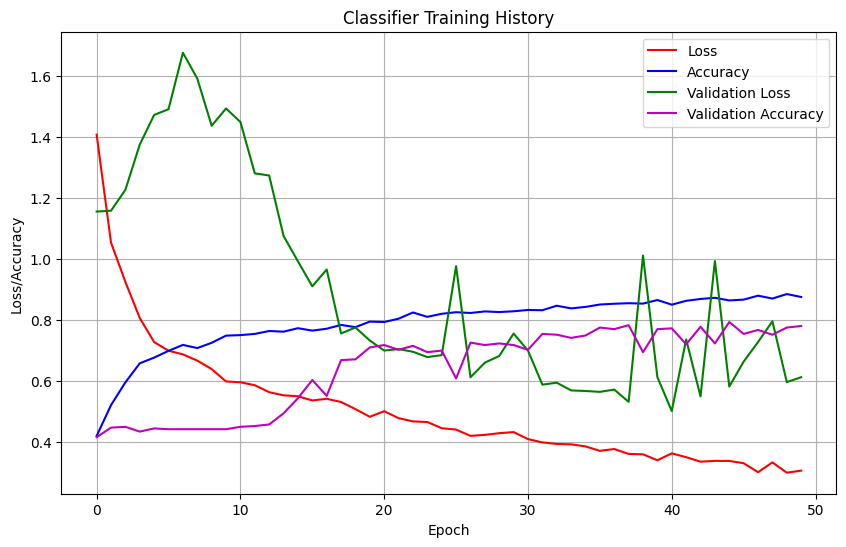

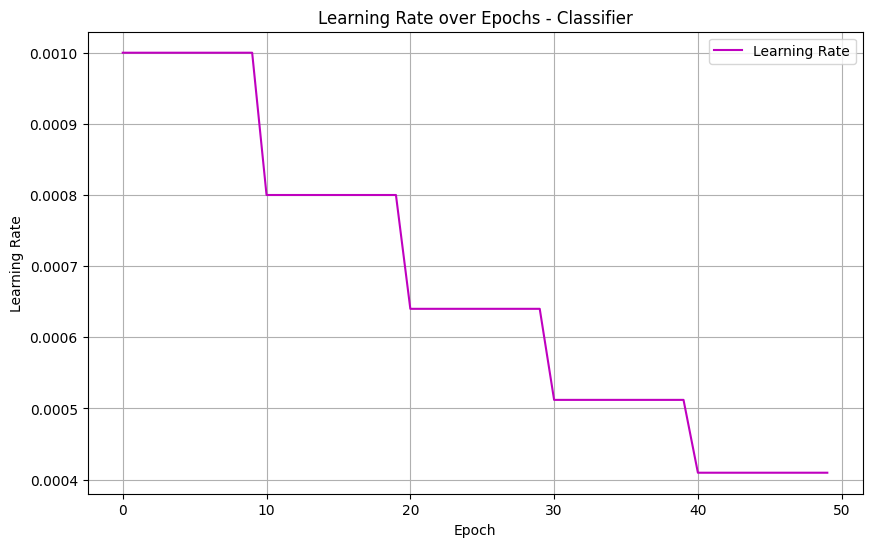

In [75]:
# Convert the history of the classifier into a pandas DataFrame for easier plotting
history_df_classifier = pd.DataFrame(history_classifier.history)

# Plot the classifier's training accuracy and loss
plt.figure(figsize=(10, 6))
plt.plot(history_df_classifier['loss'], 'r-', label='Loss')
plt.plot(history_df_classifier['classification_output_accuracy'], 'b-', label='Accuracy')  # Use correct key
plt.plot(history_df_classifier['val_loss'], 'g-', label='Validation Loss')
plt.plot(history_df_classifier['val_classification_output_accuracy'], 'm-', label='Validation Accuracy')  # Use correct key
plt.title('Classifier Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot learning rate changes for the classifier
plt.figure(figsize=(10, 6))
plt.plot(history_df_classifier['learning_rate'], 'm-', label='Learning Rate')
plt.title('Learning Rate over Epochs - Classifier')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)
plt.legend()
plt.show()



  - The **loss** (red) curve is decreasing steadily, which is a good sign that the model is learning and minimizing the error during training.
  - The **validation loss** (green) has fluctuations and even spikes. This suggests that the model might be overfitting after certain epochs, as it starts to perform worse on the validation set despite improving on the training set.
  - Already using early stopping, could consider **regularization techniques** (such as increasing dropout rates, L2 regularization) to address the overfitting issue.

  - The **accuracy** (blue) curve shows relatively flat progress over time. This could indicate that the model has learned well initially, but after a certain point (after 30?), the improvements are minimal.
  - The **validation accuracy**  (purple) fluctuates significantly. This inconsistency could be due to small batch sizes, a noisy dataset, or overfitting.

- **Smaller Learning Rate Steps**, the learning rate of model is every 10 epochs, can consider more frequent but smaller steps to stabilize learning.
- The **validation set** is small, could increasing the batch size to reduce variance in validation performance.

In [82]:
latent_vectors_eval = []
labels_eval = []

# Iterate over the validation dataset to extract latent vectors and labels
for batch in val_dataset_batched:
    images, label_batch = batch

    # Print the type and content of label_batch to debug
    print(f"Type of label_batch: {type(label_batch)}")
    print(f"Contents of label_batch: {label_batch}")

    # Assuming label_batch is a tuple, we will unpack it
    # For example, if label_batch is (labels, some_other_data), we will extract labels
    if isinstance(label_batch, tuple):
        label_batch = label_batch[0]  # Extract the actual labels (adjust this based on the tuple contents)

    z_mean, _, _ = encoder2.predict(images)  # Use encoder2 to extract latent vectors
    latent_vectors_eval.append(z_mean)

    # Convert one-hot encoded labels back to class indices if needed
    label_batch = np.argmax(label_batch, axis=1)  # Convert one-hot labels to class indices
    labels_eval.append(label_batch)

# Convert the lists to numpy arrays
latent_vectors_eval = np.vstack(latent_vectors_eval)  # Stack all latent vectors
labels_eval = np.hstack(labels_eval)  # Stack all labels as a 1D array (class indices)

# Use the classifier to predict the classes based on the latent vectors
predicted_labels_eval = classifier.predict(latent_vectors_eval)
predicted_labels_eval = np.argmax(predicted_labels_eval, axis=1)  # Get predicted class indices



Type of label_batch: <class 'tuple'>
Contents of label_batch: (<tf.Tensor: shape=(128, 64, 64, 1), dtype=float32, numpy=
array([[[[ 2.15599090e-01],
         [ 2.70101279e-01],
         [ 2.92005956e-01],
         ...,
         [ 3.60938221e-01],
         [ 3.54605585e-01],
         [ 3.31455112e-01]],

        [[ 2.33351231e-01],
         [ 2.74565250e-01],
         [ 3.50660652e-01],
         ...,
         [ 3.61041993e-01],
         [ 3.64156425e-01],
         [ 3.40590715e-01]],

        [[ 2.53906339e-01],
         [ 2.76330084e-01],
         [ 3.48895788e-01],
         ...,
         [ 3.75887334e-01],
         [ 3.69139493e-01],
         [ 3.49726319e-01]],

        ...,

        [[ 1.29226148e-01],
         [ 1.06802396e-01],
         [ 2.59616077e-01],
         ...,
         [ 3.94262403e-01],
         [ 2.76952982e-01],
         [ 2.43836403e-01]],

        [[ 1.25904098e-01],
         [ 1.07632898e-01],
         [ 2.70931780e-01],
         ...,
         [ 4.14921314e-01],
   

In [83]:
latent_vectors_eval = []
labels_eval = []

# Iterate over the validation dataset to extract latent vectors and labels
for batch in val_dataset_batched:
    images, label_batch = batch

    # Extract the labels from the tuple (second element)
    label_batch = label_batch[1]  # Extract the one-hot encoded labels (shape = (128, 3))

    # Print to check the shape of label_batch
    print(f"Shape of label_batch: {label_batch.shape}")

    # Extract latent vectors using the encoder
    z_mean, _, _ = encoder2.predict(images)
    latent_vectors_eval.append(z_mean)

    # Convert one-hot encoded labels back to class indices
    label_batch = np.argmax(label_batch, axis=1)
    labels_eval.append(label_batch)

# Convert the lists to numpy arrays
latent_vectors_eval = np.vstack(latent_vectors_eval)  # Stack all latent vectors
labels_eval = np.hstack(labels_eval)  # Stack all labels as a 1D array (class indices)

# Use the classifier to predict the classes based on the latent vectors
predicted_labels_eval = classifier.predict(latent_vectors_eval)
predicted_labels_eval = np.argmax(predicted_labels_eval, axis=1)  # Get predicted class indices


Shape of label_batch: (128, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Shape of label_batch: (128, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Shape of label_batch: (128, 3)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Classification Report - Multi-Class:
                     precision    recall  f1-score   support

             NORMAL       0.86      0.95      0.90       110
BACTERIAL PNEUMONIA       0.77      0.86      0.82       170
    VIRAL PNEUMONIA       0.73      0.51      0.60       104

           accuracy                           0.79       384
          macro avg       0.79      0.77      0.77       384
       weighted avg       0.79      0.79      0.78       384

Confusion Matrix - Multi-Class:
[[104   2   4]
 [  7 147  16]
 [ 10  41  53]]


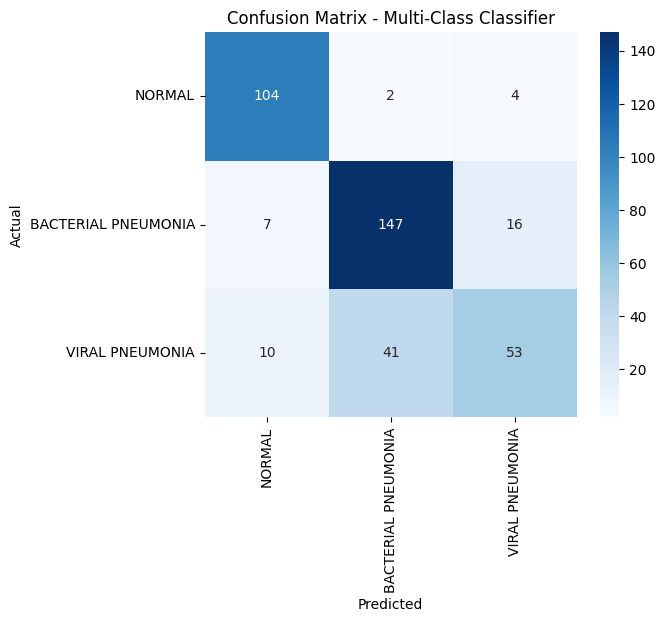

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure true_labels_eval and predicted_labels_eval are already defined from the previous code

# Evaluate the model performance using classification report and confusion matrix
print("Classification Report - Multi-Class:")
print(classification_report(labels_eval, predicted_labels_eval, target_names=['NORMAL', 'BACTERIAL PNEUMONIA', 'VIRAL PNEUMONIA']))

# Confusion Matrix
cm_multi = confusion_matrix(labels_eval, predicted_labels_eval)
print("Confusion Matrix - Multi-Class:")
print(cm_multi)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
            xticklabels=['NORMAL', 'BACTERIAL PNEUMONIA', 'VIRAL PNEUMONIA'],
            yticklabels=['NORMAL', 'BACTERIAL PNEUMONIA', 'VIRAL PNEUMONIA'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multi-Class Classifier')
plt.show()


The model achieved an **accuracy of 79%** across the three classes. This indicates that the model correctly classified approximately 79% of the test samples.

- **NORMAL**: The model performed very well for the NORMAL class, with a **precision of 0.86**, **recall of 0.95**, and an **F1-score of 0.90**. This suggests that the model is highly effective at correctly identifying NORMAL cases while keeping false positives low.

- **BACTERIAL PNEUMONIA**: For BACTERIAL PNEUMONIA, the model achieved a **precision of 0.77**, **recall of 0.86**, and an **F1-score of 0.82**. The recall is quite strong, meaning most BACTERIAL PNEUMONIA cases are correctly identified. However, the precision is slightly lower, indicating some confusion with the other classes (especially VIRAL PNEUMONIA).
  
- **VIRAL PNEUMONIA**: This class shows weaker performance compared to the other two. The model had a **precision of 0.73**, **recall of 0.51**, and an **F1-score of 0.60**. This suggests that the model struggles to distinguish VIRAL PNEUMONIA cases accurately, misclassifying them as BACTERIAL PNEUMONIA more often (41 misclassified instances according to the confusion matrix).

While the model demonstrates solid performance, particularly for the NORMAL and BACTERIAL PNEUMONIA classes, the VIRAL PNEUMONIA class requires further improvement. The disparity between precision and recall for VIRAL PNEUMONIA suggests the need for more training examples or additional model fine-tuning to better differentiate it from BACTERIAL PNEUMONIA.

Further improvement strategies:
- **More Data augmentation** may help the model generalize better.
- **Model tuning**, experimenting of different architectures or fine-tuning hyperparameters (e.g., learning rates, optimizers) might improve performance.
- **Class balancing**, as the data is imbalanced, class weights or oversampling methods could be applied to give more importance to the minority class (viral pneumonia).

In [89]:
# Check dataset structure
for batch in multi_class_dataset.take(1):
    print(f"Batch structure: {type(batch)}, length: {len(batch)}")
    print(f"Batch content: {batch}")


Batch structure: <class 'tuple'>, length: 2
Batch content: (<tf.Tensor: shape=(), dtype=string, numpy=b'/content/drive/MyDrive/Colab Notebooks/HDAT9510/Assignment1/chest_xray/train/PNEUMONIA/person1012_bacteria_2943.jpeg'>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)


Shape of original images: (1, 64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Shape of reconstructed images: (1, 64, 64, 1)


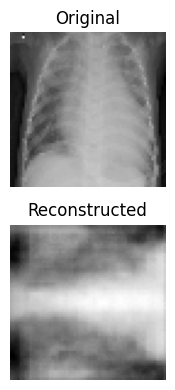

In [91]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to load and preprocess the images from file paths
def load_and_preprocess_image(image_path):
    image = tf.io.read_file(image_path)  # Read the file
    image = tf.image.decode_jpeg(image, channels=1)  # Decode the JPEG image as grayscale
    image = tf.image.resize(image, [64, 64])  # Resize to the input size expected by the VAE
    image = image / 255.0  # Normalize the image to [0, 1]
    return image

# Visualize reconstructions for the multi-class problem
def visualize_reconstructions_multi_class(original_images, reconstructed_images, num_images=5):
    available_images = min(num_images, len(original_images))  # Ensure we don't exceed available images
    plt.figure(figsize=(12, 4))
    for i in range(available_images):
        # Display original
        ax = plt.subplot(2, available_images, i + 1)
        plt.imshow(tf.squeeze(original_images[i]), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed
        ax = plt.subplot(2, available_images, i + 1 + available_images)
        plt.imshow(tf.squeeze(reconstructed_images[i]), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Select a batch of file paths from the dataset for visualization (extract only the file paths, ignore the labels)
file_paths = []
for images, _ in multi_class_dataset.take(1):  # Take a batch from the dataset
    file_paths = [images.numpy()]  # Convert the image paths to a list

# Load and preprocess the images from the file paths
original_images_multi = [load_and_preprocess_image(fp) for fp in file_paths]
original_images_multi = tf.stack(original_images_multi)  # Convert list to Tensor

# Check shapes before proceeding to the reconstruction step
print(f"Shape of original images: {original_images_multi.shape}")

# Use the VAE to reconstruct the images
reconstructed_images_multi = vae.predict(original_images_multi)

# Check the shape of the reconstructed images
print(f"Shape of reconstructed images: {reconstructed_images_multi.shape}")

# Visualize the original and reconstructed images
visualize_reconstructions_multi_class(original_images_multi, reconstructed_images_multi, num_images=5)


Shape of original images: (5, 64, 64, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shape of reconstructed images: (5, 64, 64, 1)


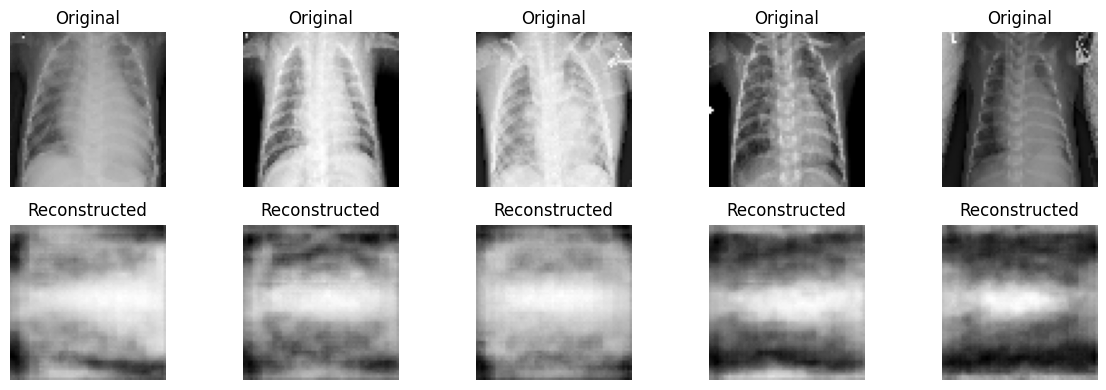

In [102]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to preprocess images from the dataset
def preprocess_images(image_tensor):
    image = tf.io.read_file(image_tensor)  # Read the image file
    image = tf.image.decode_jpeg(image, channels=1)  # Decode the JPEG image as grayscale
    image = tf.image.resize(image, [64, 64])  # Resize to the input size expected by the VAE
    image = image / 255.0  # Normalize the image to [0, 1]
    return image

# Visualize reconstructions for the multi-class problem
def visualize_reconstructions_multi_class(original_images, reconstructed_images, num_images=5):
    available_images = min(num_images, len(original_images))  # Ensure we don't exceed available images
    plt.figure(figsize=(12, 4))
    for i in range(available_images):
        # Display original
        ax = plt.subplot(2, available_images, i + 1)
        plt.imshow(tf.squeeze(original_images[i]), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed
        ax = plt.subplot(2, available_images, i + 1 + available_images)
        plt.imshow(tf.squeeze(reconstructed_images[i]), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Take a batch of image paths from the dataset for visualization
image_paths, _ = next(iter(multi_class_dataset.batch(5)))  # Take 5 image paths directly from the dataset

# Preprocess the images (decode, resize, normalize)
original_images_multi = [preprocess_images(img_path) for img_path in image_paths]
original_images_multi = tf.stack(original_images_multi)  # Convert list to Tensor

# Check shapes before proceeding to the reconstruction step
print(f"Shape of original images: {original_images_multi.shape}")

# Use the VAE to reconstruct the images
reconstructed_images_multi = vae.predict(original_images_multi)

# Check the shape of the reconstructed images
print(f"Shape of reconstructed images: {reconstructed_images_multi.shape}")

# Visualize the original and reconstructed images
visualize_reconstructions_multi_class(original_images_multi, reconstructed_images_multi, num_images=5)


The reconstruction images generated by the **Variational Autoencoder (VAE)** provide useful insight into how well/bad the model captures and reconstructs key features of the original chest X-rays.

- **Blurriness and Loss of Detail**: The reconstructed images appear much blurrier and more abstract compared to the original X-ray images. This suggests that the latent space learned by the VAE may be focusing on more generalized features rather than capturing fine-grained details.
  
- **Retained General Structure**: Despite the blurriness, the general structure of the chest (such as the overall shape of the lungs and rib cage) is somewhat retained. This indicates that the VAE is capable of capturing some high-level patterns, but may not be able to capture the complex details required for medical diagnosis.

- **Possible Over-smoothing**: The reconstructed images show signs of over-smoothing, especially in areas like the edges of the lungs or ribs. This could be a result of either the complexity of the dataset or the capacity of the VAE model itself. Some fine details for distinguishing between pneumonia types may be lost, which could be a reason of the model's classification performance issues (as seen with viral pneumonia in the classification report).

- Name the model "model-3-classes". Save the model so you don't have to retrain it every time you close and reopen the notebook.

In [104]:
# Save the model as "model-3-classes" with and .keras extension
# Save the model with a specific name and .keras extension
vae_with_classifier_model.save('model-3-classes.keras')


In [ ]:
# Load the saved model
# loaded_model = tf.keras.models.load_model('model-3-classes.keras')


# Question 6: Denoiser Autoencoder and Transfer Learning (25 marks)
**Objective: Implement a denoiser autoencoder to reconstruct chest X-ray images and then use a neural network for transfer learning to classify images into "normal" and "pneumonia."

1. **Denoiser Autoencoder**:
- Train a denoising autoencoder using a subset of the dataset to remove noise from the images. Add random noise to the X-ray images and train the autoencoder to reconstruct the original, clean images.
- **Show 5 reconstructed images** after training and compare them with the noisy input images.

2. **Transfer Learning with a Dense Neural Network**:
Use the encoder part of your denoiser autoencoder for transfer learning. Freeze the encoder layers and add a neural network to classify images as "normal" or "pneumonia" (binary classification).
Train the model and evaluate its performance.
Justify your approach and explain whether using the encoder's learned features improves classification performance compared to the previous model you built in Assignment 1A.

# Question 7: Variational Autoencoder (VAE) for Image Generation and Anomaly Detection (25 marks)
**Objective**: Implement a variational autoencoder (VAE) to generate synthetic images of healthy individuals (i.e., those not infected with pneumonia). As an extra task, use the VAE for anomaly detection to identify images of individuals infected with pneumonia.

1. **Variational Autoencoder**:
- Train a simple VAE using a subset of the dataset containing only images of healthy individuals (i.e., no pneumonia).
- **Generate 5 synthetic images** from the latent space and display them. We would like to test the VAE as a proof of concept for balancing our dataset.

2. **Evaluation**:
- Discuss the quality of the generated images. Explain how well the VAE captures the characteristics of healthy individuals and any limitations observed in the generated samples.
- Provide an analysis of how VAEs could be utilized for augmenting datasets or generating synthetic medical data for further model training.

3. **Extra Task: Anomaly Detection**:
- Use the VAE's reconstruction loss as a means of detecting anomalies. Create a simple classifier that uses the reconstruction error to detect infected (pneumonia) images.
- Classify images as "healthy" or "infected" based on whether the reconstruction error is above or below a defined threshold.
- Discuss the performance of this simple classifier and its potential usefulness for identifying infected images.